# Analsying the Athletes_Data dataset

## Importing all the stuff

### Importing necessary packages

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics


In [82]:
plt.style.use('ggplot')

### Importing the dataset from github repository

In [83]:
df = pd.read_csv("https://raw.githubusercontent.com/njuliann/athlete_events/refs/heads/main/athlete_events.csv")

Checking the shape of the dataset to see whether the import has worked successfully

In [84]:
[True if df.shape == (271116, 15) else False]

[True]

## Getting a quick overview about the dataset

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [86]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


One can directly see some special things in the dataset: 
- The 'Games' column contains the same data but combined as the 'Year' and 'Season' columns do → Drop the column
- There are missing values in the 'Height' and 'Weight' columns (and maybe in others too) → Find a way to either fill these cells with plausible values or drop them
- There are missing values in the 'Medal' column, probably if an athlete did not win a medal in the coresponding games
- The 'Team' column doesn't necessarily contain just the country for which the athlete started. So it might be better to take the 'NOC' column to determine the nationality (see also the number of unique teams below)

In [87]:
df.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372
mean,68248.954396,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN
75%,102097.250000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN


### Checking for duplicates

In [88]:
df[df.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


In [89]:
df.duplicated().sum()

np.int64(1385)

It seems that most duplicate values are in Art Competitions beteween 1920 and 1950

### Finding missing values

In [90]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

<Axes: >

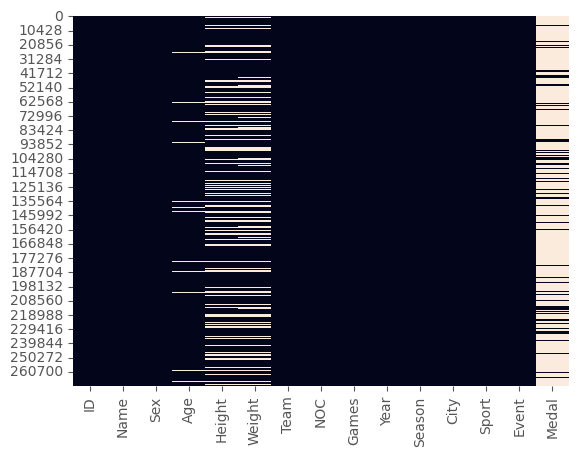

In [91]:
sns.heatmap(df.isnull(), cbar = False)

## Cleaning the dataset

### Removing the duplicates

In [92]:
print('Number of duplicate values before cleaning: ', df.duplicated().sum())
df.drop_duplicates(inplace = True)
print('Number of duplicate values after cleaning:  ', df.duplicated().sum())

Number of duplicate values before cleaning:  1385
Number of duplicate values after cleaning:   0


### Dropping 'Games' column

The 'Games' column contains the same values as the 'Year' and 'Season' columns. As this provides no additional value it can be dropped. 

In [93]:
df.drop(['Games'], axis = 1, inplace = True)

### Dealing with missing values: 'Age'

In [95]:
df.fillna(round(df.Age.median()), inplace = True)

### Dealing with missing values: 'Height'

In [97]:
df.fillna(round(df.Height.median()), inplace = True)

### Dealing with missing values: 'Weight'

In [99]:
df.fillna(round(df.Weight.median()), inplace = True)

## Exploring the data

### Distribution of medals

In [101]:
print('Medal distribution: ', df['Medal'].value_counts())

Medal distribution:  Medal
24        229959
Gold       13369
Bronze     13295
Silver     13108
Name: count, dtype: int64


When looking at the medals, you can see that Gold > Bronze > Silver. 
Usually they should be the same number. Finding out whether there are too many gold or not enough silver medals in the dataset and which medals belong to each other would take way too much time. Regarding the small difference (261 'missing' Silver medals) and the lenght of the dataset (269731 total values) I will just ignore this.  

### Distribution of athletes by gender

In [26]:
print(f"{df.Sex.value_counts()["M"]} men and {df.Sex.value_counts()["F"]} women have participated in the Olympic Games")

195353 men and 74378 women have participated in the Olympic Games


<Axes: title={'center': 'Athlete Gender Distribution'}, xlabel='Sex'>

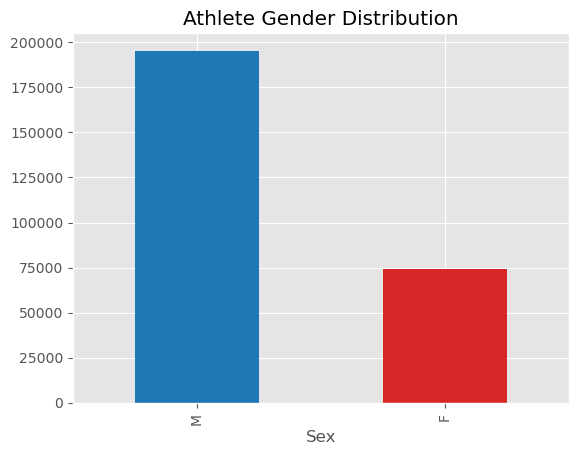

In [ ]:
df.Sex.value_counts().plot(kind = 'bar', title = 'Athlete Gender Distribution', color = ['tab:blue' , 'tab:red'],  grid = True)

### Age distribution

Text(0.5, 1.0, 'Age Distribution of Athletes')

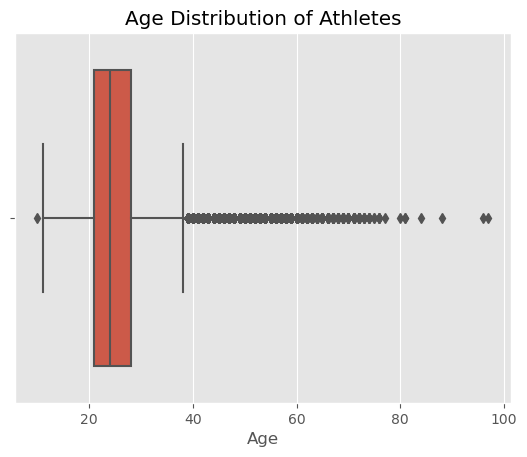

In [ ]:
sns.boxplot(x = df.Age, color=)
plt.title('Age Distribution of Athletes')

### Did the mean age change over the decades?